In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv( 'dataset.csv')

C:\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head(5)

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [4]:
#df.info()

In [5]:
#df.dtypes

## Identify the columns with mixed data types.

In [6]:
for col in data.columns:
    wd = (data[[col]].applymap(type) != data[[col]].iloc[0].apply(type)).any(axis=1)
    if len(data[wd]) > 0:
        print(col)

region
province
city
claimed
awards
popularity_detailed
popularity_generic
top_tags
price_level
price_range
meals
cuisines
special_diets
features
original_open_hours
default_language
keywords


## For each column, the number of rows per data type.

In [7]:
def count_rows(col):
    return col.value_counts().to_dict()
result = data.applymap(lambda x: type(x)).apply(count_rows)
print(result)

restaurant_link                                              {<class 'str'>: 1083397}
restaurant_name                                              {<class 'str'>: 1083397}
original_location                                            {<class 'str'>: 1083397}
country                                                      {<class 'str'>: 1083397}
region                               {<class 'str'>: 1033074, <class 'float'>: 50323}
province                             {<class 'str'>: 742765, <class 'float'>: 340632}
city                                 {<class 'str'>: 682712, <class 'float'>: 400685}
address                                                      {<class 'str'>: 1083397}
latitude                                                   {<class 'float'>: 1083397}
longitude                                                  {<class 'float'>: 1083397}
claimed                               {<class 'str'>: 1081555, <class 'float'>: 1842}
awards                               {<class 'float'>:

## Would removing missing values solve the mixed data type problem?

In [60]:
df = data.dropna()
df.reset_index(drop=True, inplace=True)

In [61]:
def count_rows(col):
    return col.value_counts().to_dict()
result = df.applymap(lambda x: type(x)).apply(count_rows)
print(result)

restaurant_link                        {<class 'str'>: 2177}
restaurant_name                        {<class 'str'>: 2177}
original_location                      {<class 'str'>: 2177}
country                                {<class 'str'>: 2177}
region                                 {<class 'str'>: 2177}
province                               {<class 'str'>: 2177}
city                                   {<class 'str'>: 2177}
address                                {<class 'str'>: 2177}
latitude                             {<class 'float'>: 2177}
longitude                            {<class 'float'>: 2177}
claimed                                {<class 'str'>: 2177}
awards                                 {<class 'str'>: 2177}
popularity_detailed                    {<class 'str'>: 2177}
popularity_generic                     {<class 'str'>: 2177}
top_tags                               {<class 'str'>: 2177}
price_level                            {<class 'str'>: 2177}
price_range             

#### The Answer is Yes 

## Are the review columns correlated with the rating columns?

In [10]:
df_col_corr = data.dropna(subset=['excellent','very_good','average','poor','terrible','total_reviews_count','reviews_count_in_default_language','food','service','value','atmosphere','avg_rating'], how='any')
df1= df_col_corr[['excellent','very_good','average','poor','terrible','total_reviews_count','reviews_count_in_default_language','food','service','value','atmosphere','avg_rating']]

corr_df = df1.corr()[["food", "service", "value", "atmosphere", "avg_rating"]]

corr_df.drop(['food','service','value','atmosphere','avg_rating'], axis=0, inplace=True)

In [11]:
corr_df

,food,service,value,atmosphere,avg_rating
excellent,0.176481,0.200655,0.153074,0.167152,0.201337
very_good,0.044115,0.067600,0.024811,0.067165,0.063574
average,-0.058866,-0.031617,-0.073911,-0.014749,-0.043635
poor,-0.117185,-0.088133,-0.128617,-0.057795,-0.104748
terrible,-0.213245,-0.186161,-0.200676,-0.139008,-0.212464
total_reviews_count,0.092710,0.079956,0.026394,0.093973,0.110474
reviews_count_in_default_language,0.086819,0.113827,0.066676,0.100901,0.108944


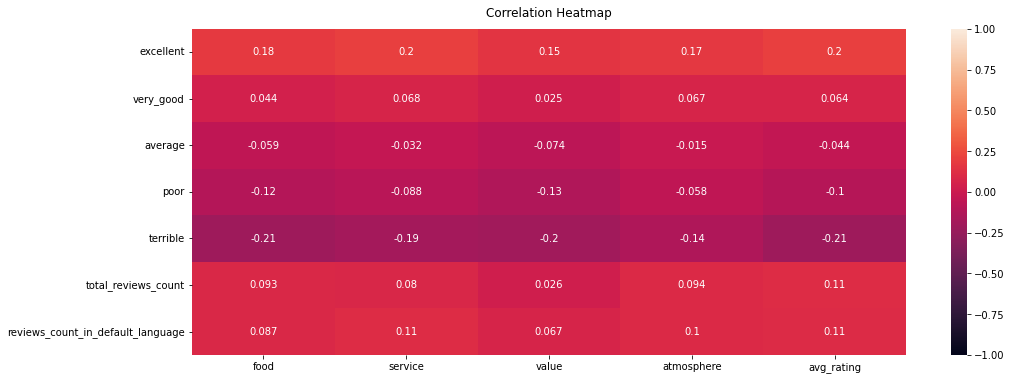

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### We can see that there is high correlation between positive reviwe (Excellent, Very good) and high raiting of Food, Service, etc...

## Are vegetarian-friendly restaurants better than non-vegetarian ones?

In [13]:
veg_df = data.dropna(subset=['vegetarian_friendly','avg_rating'], how='any')
df2= veg_df[['vegetarian_friendly','avg_rating']]
df2.sample(n=5)

,vegetarian_friendly,avg_rating
815964,Y,4.0
43886,Y,5.0
1036173,Y,4.5
477512,N,4.0
884973,Y,3.5


In [14]:
df2['vegetarian_friendly'].unique()

array(['N', 'Y'], dtype=object)

In [15]:
N_Y = df2['vegetarian_friendly'].value_counts()
pd.DataFrame(N_Y)

,vegetarian_friendly
N,663433
Y,323328


In [16]:
H = df2.groupby(['vegetarian_friendly'])['avg_rating'].value_counts()
pd.DataFrame(H)

avg_rating
vegetarian_friendly avg_rating            
N                   4.0             178949
                    4.5             158133
                    5.0             108648
                    3.5             106309
                    3.0              62294
                    2.5              25534
                    2.0              13336
                    1.0               6369
                    1.5               3861
Y                   4.5             135661
                    4.0             118030
                    3.5              40978
                    5.0              19459
                    3.0               8032
                    2.5               1031
                    2.0                120
                    1.0                 12
                    1.5                  5

## Deciding on the Nature of the Sentiment
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
#### The sentiments of the review are decided on the avarege rating.

##### 1- if the avarege rating score is greater than 3, the sentiment is Positive
##### 2- if the avarege rating value is less than 3, the sentiment is Negative
##### 3- and if it is equal to 3, the sentiment is Neutral.

In [17]:
df2.loc[df2['avg_rating'] > 3  ,'sentiment'] = 'Positive'
df2.loc[df2['avg_rating'] < 3  ,'sentiment'] = 'Negative'
df2.loc[df2['avg_rating'] == 3  ,'sentiment'] = 'Neutral'

C:\Python\Python310\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Python\Python310\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [58]:
df2.sample(n=5)

,vegetarian_friendly,avg_rating,sentiment
359510,N,5.0,Positive
470238,N,4.0,Positive
718956,Y,3.0,Neutral
1057214,N,4.0,Positive
720196,Y,4.0,Positive


In [52]:
df2.groupby(['vegetarian_friendly'])['sentiment'].value_counts()

vegetarian_friendly  sentiment
N                    Positive     552039
                     Neutral       62294
                     Negative      49100
Y                    Positive     314128
                     Neutral        8032
                     Negative       1168
Name: sentiment, dtype: int64

In [55]:
df2.loc[df2['sentiment'] == 'Positive', 'vegetarian_friendly'].value_counts()

N    552039
Y    314128
Name: vegetarian_friendly, dtype: int64

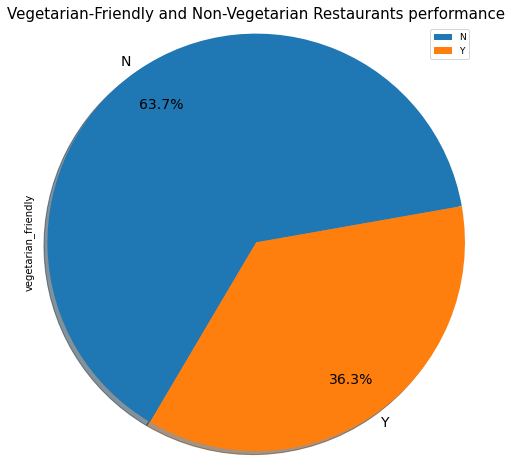

In [59]:
df2.loc[df2['sentiment'] == 'Positive', 'vegetarian_friendly'].value_counts().head(10).plot(kind='pie',figsize=(8,8),radius=1.2,startangle=10,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Vegetarian-Friendly and Non-Vegetarian Restaurants performance',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

#### We can see from the chart that Non-Vegetarian Restaurants are better than Vegetarian-Friendly Restaurants.

N    552039
Y    314128
Name: vegetarian_friendly, dtype: int64

## Are there any significantly more expensive cuisines?

In [20]:
exp_df = data.dropna(subset=['price_level','cuisines'], how='any')
df3= exp_df[['price_level','cuisines']]
df3.sample(n=10)

,price_level,cuisines
876365,€,"Cafe, Healthy"
664182,€,Italian
577972,€€-€€€,"Bar, British, Pub"
87104,€€-€€€,French
140966,€€-€€€,"Italian, Pizza"
320109,€€-€€€,"Austrian, German, European"
1039711,€€-€€€,Cafe
999636,€,"Mediterranean, Portuguese"
973897,€€-€€€,"Mediterranean, Barbecue, Greek"
26818,€€-€€€,"French, European"


In [21]:
df3.loc[df3['price_level'] == '€€-€€€'  ,'price'] = 'expensive'
df3.loc[df3['price_level'] == '€€€€'  ,'price'] = 'middle'
df3.loc[df3['price_level'] == '€' ,'price'] = 'cheap'
df3.sample(n=20)

C:\Python\Python310\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Python\Python310\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,price_level,cuisines,price
1006511,€,Healthy,cheap
941148,€€-€€€,"Japanese, Sushi, Asian, Seafood",expensive
603586,€€-€€€,"Pub, Gastropub, Bar, British",expensive
266915,€€-€€€,"American, German",expensive
470627,€,British,cheap
948309,€€-€€€,"Belgian, European",expensive
747750,€€-€€€,"Chinese, Japanese, Sushi, Asian, Central Asian...",expensive
1001892,€€-€€€,"European, Portuguese, International",expensive
355430,€€-€€€,"Brew Pub, Cafe, Mediterranean, Dining bars, Sp...",expensive
132588,€€-€€€,"French, European",expensive


In [34]:
df3.loc[df3['price'] == 'expensive', 'cuisines'].value_counts().head(10)

French                    23482
Italian                   22671
Spanish                   12266
Italian, Pizza            11324
Cafe                      11237
Bar, British, Pub         11009
French, European          10836
Mediterranean, Spanish     7903
German                     7593
Cafe, British              5999
Name: cuisines, dtype: int64

In [47]:
y=df3.loc[df3['price'] == 'expensive', 'cuisines'].value_counts().head(5)

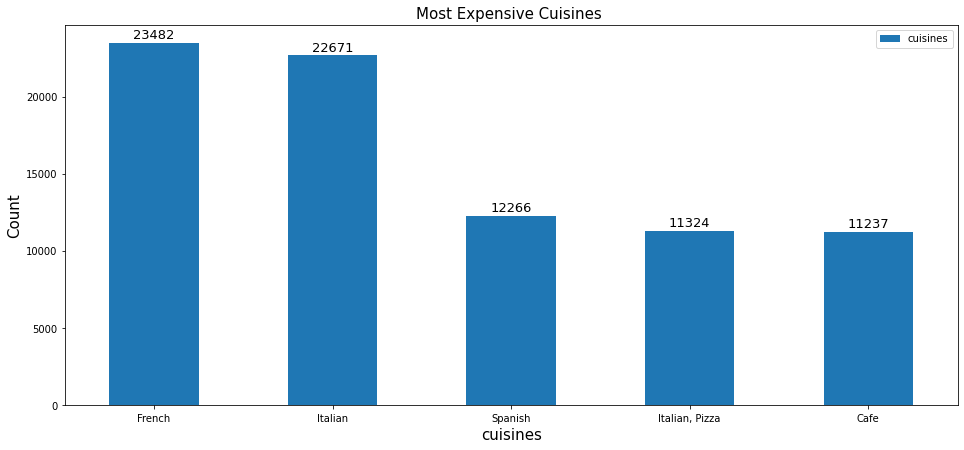

In [49]:
axx=y.plot(kind='bar', figsize=(16,7))
for i, v in y.reset_index().iterrows():
    axx.text(i, v.cuisines + 500, v.cuisines, color='black',ha="center", va="center",fontsize=13)
plt.ylabel('Count',fontsize=15)
plt.xlabel('cuisines',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Most 5 Expensive Cuisines ',fontsize=15)
plt.legend()
plt.show()

#### As we can see the French and Italian cuisines are the most expensive cuisines.

In [117]:
europe_capitals_data = pd.read_csv( 'europe_capitals_population_and_area.csv', sep= ';')

In [118]:
europe_capitals_data

,CityNo,City,Country,Population,"Area_in_km2,"
0,1,Amsterdam,Netherland,851573,"219,32"
1,2,Athens,Greece,664046,"2929,"
2,4,Barcelona,Spain,1620809,"101,4"
3,4,Berlin,Germany,3711930,"891,7"
4,5,Bratislava,Slovakia,424428,"367,6"
5,6,Brussels,Belgium,1191604,"161,38"
6,7,Budapest,Hungary,1779361,"525,2"
7,8,Copenhagen,Denmark,602481,"88,25"
8,9,Dublin,Ireland,527612,"115,"
9,10,Edinburgh,Scotland,482005,"264,"


In [120]:
europe_capitals_data['density'] = europe_capitals_data['Population'] / europe_capitals_data['Area_in_km2,']

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [90]:
ddf = europe_capitals_data['City','density']
ddf

0      Amsterdam
1         Athens
2      Barcelona
3         Berlin
4     Bratislava
5       Brussels
6       Budapest
7     Copenhagen
8         Dublin
9      Edinburgh
10        Geneva
11       Hamburg
12      Helsinki
13        Krakow
14        Lisbon
15     Ljubljana
16        London
17    Luxembourg
18          Lyon
19        Madrid
20         Milan
21        Munich
22        Oporto
23          Oslo
24         Paris
25        Prague
26          Rome
27     Stockholm
28        Vienna
29        Warsaw
30        Zurich
Name: City, dtype: object

In [62]:
df_cap_pop = data.dropna(subset=['country','city','gluten_free'], how='any')

In [64]:
df4= df_cap_pop[['country','city','gluten_free']]

In [66]:
df4['gluten_free'].unique()

array(['N', 'Y'], dtype=object)

In [106]:
df5 = df4.loc[df4['gluten_free'] == 'Y']
df5

,country,city,gluten_free
71,France,Espaly-Saint-Marcel,Y
147,France,Franconville,Y
288,France,Lambersart,Y
371,France,Carentan,Y
412,France,Les Vans,Y
...,...,...,...
1082973,Romania,Hunedoara,Y
1083065,Romania,Satu Mare,Y
1083250,Romania,Fagaras,Y
1083268,Romania,Hateg,Y


In [107]:
df5.loc[df5['city'].isin(ddf)].value_counts()

country          city        gluten_free
Italy            Rome        Y              1654
Spain            Madrid      Y              1368
Italy            Milan       Y              1154
The Netherlands  Amsterdam   Y               622
Ireland          Dublin      Y               596
France           Paris       Y               582
Portugal         Lisbon      Y               537
Hungary          Budapest    Y               433
Austria          Vienna      Y               413
Czech Republic   Prague      Y               389
Sweden           Stockholm   Y               366
Greece           Athens      Y               271
Germany          Munich      Y               256
Denmark          Copenhagen  Y               251
Finland          Helsinki    Y               199
Slovakia         Bratislava  Y                67
France           Lyon        Y                54
dtype: int64